In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
from scipy.stats import zscore

In [5]:
import seaborn as sns

In [6]:
# reading the CSV file into pandas dataframe
custData = pd.read_csv("Cust_Spend_Data.csv") 
custData.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [14]:

custDataAttr=custData.iloc[:,2:]
custDataAttr.head(10)



,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [16]:
custDataScaled=custDataAttr.apply(zscore)
custDataScaled.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


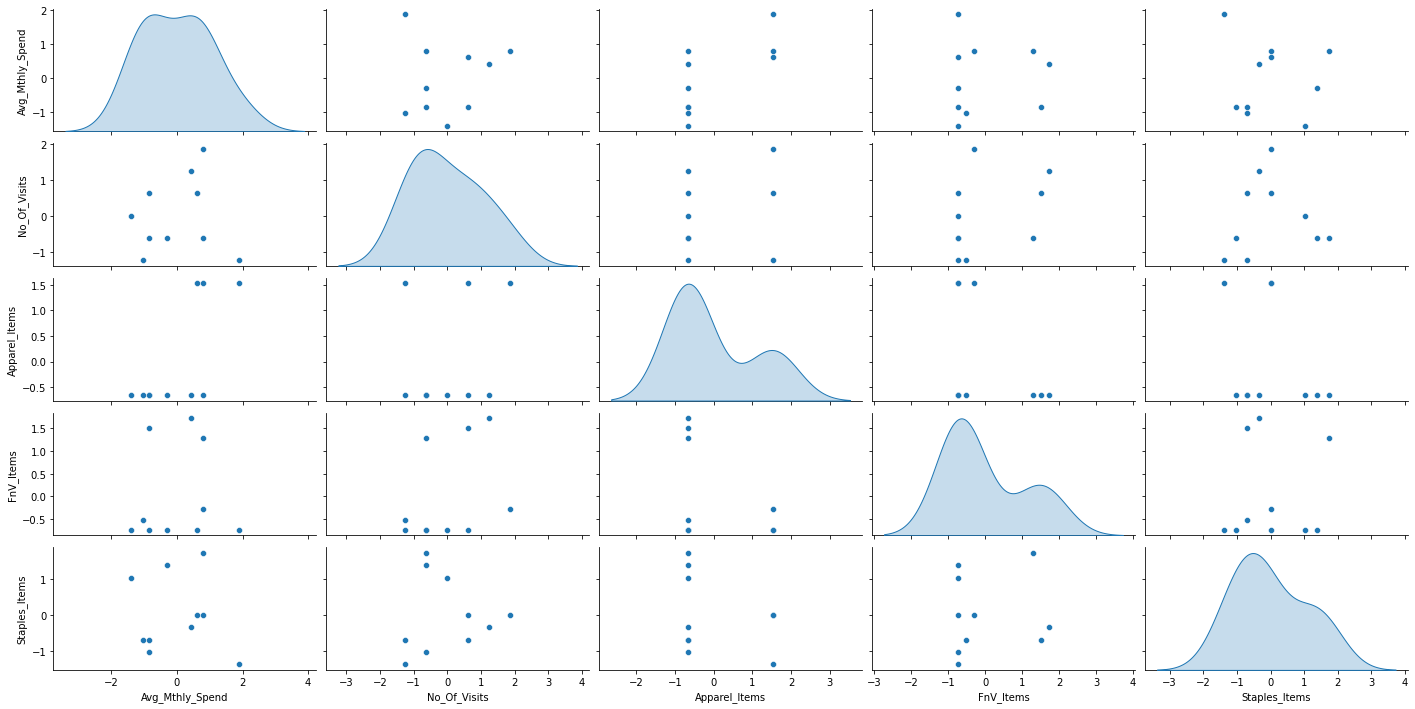

In [17]:
#importing seaborn for statistical plots
sns.pairplot(custDataScaled, height=2,aspect=2 , diag_kind='kde')

In [31]:
from sklearn.cluster import AgglomerativeClustering 

In [38]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [39]:
model.fit(custDataScaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [40]:
custDataAttr['labels'] = model.labels_
custDataAttr.head(10)



,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [41]:
custDataAttr.groupby(["labels"]).count()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,3,3,3,3,3
1,3,3,3,3,3
2,4,4,4,4,4


In [42]:
custDataClust = custDataAttr.groupby(['labels'])

In [43]:
custDataClust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [44]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [45]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [29]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.8681149436293064

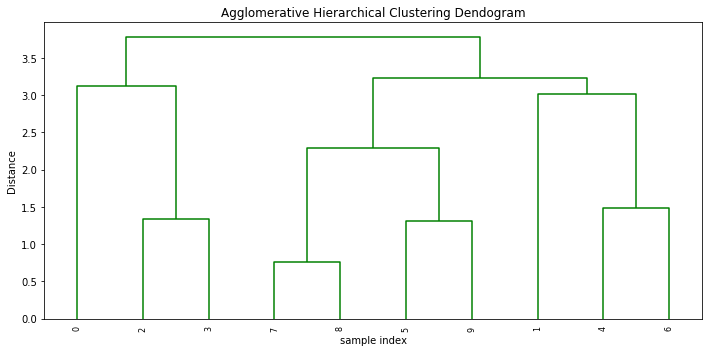

In [30]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [31]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.8606955190809153

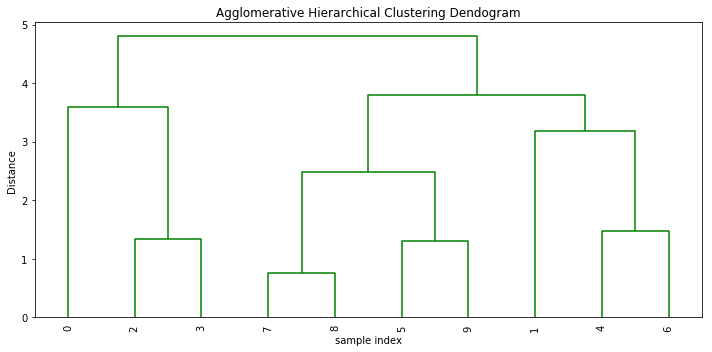

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [33]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.8453818941339526

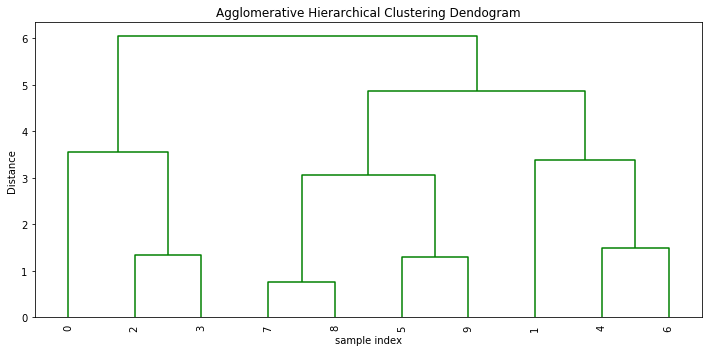

In [34]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()